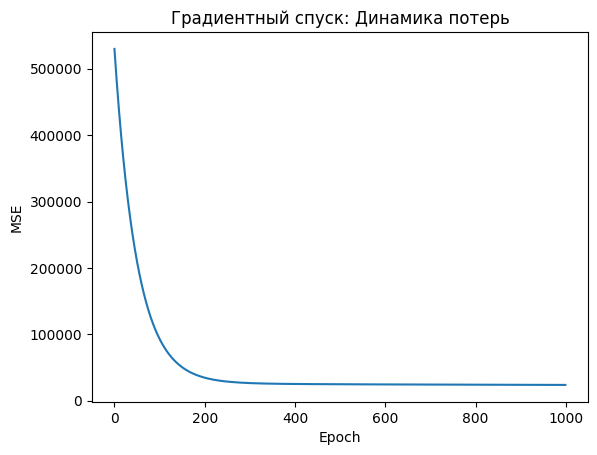

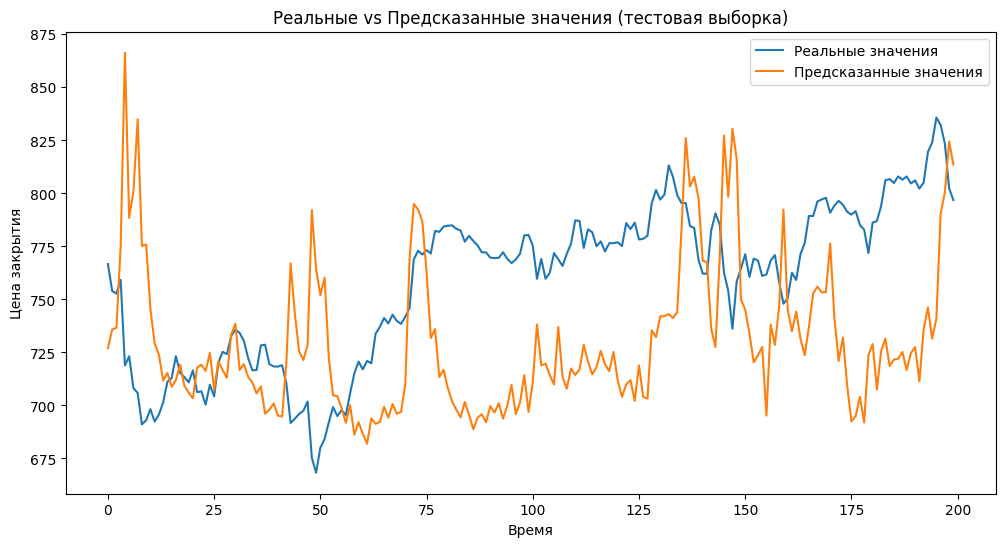

MSE: 3139.22
MAE: 47.70


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


data = pd.read_csv('Google_Stock_Price.csv', parse_dates=['Date'])
data = data.sort_values('Date').reset_index(drop=True)


lag_days = 3
features = ['Open', 'High', 'Low', 'Volume']

for feature in features:
    for lag in range(1, lag_days + 1):
        data[f'{feature}_lag{lag}'] = data[feature].shift(lag)

data = data.dropna()

for feature in features:
    data[f'{feature}_squared'] = data[feature] ** 2

y = data['Close']
X = data.drop(['Date', 'Close'], axis=1)

train_size = len(data) - 200
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


class NeuralNetwork:
    def __init__(self, input_size, output_size=1):
        self.W = np.random.randn(input_size, output_size) * 0.01
        self.b = np.zeros(output_size)
    
    def forward(self, X):
        self.z = np.dot(X, self.W) + self.b
        return self.z
    
    def backward(self, X, y, lr=0.001):
        m = X.shape[0]
        delta = (self.z - y) / m  # Градиент MSE
        dW = np.dot(X.T, delta)
        db = np.sum(delta, axis=0)
        
        
        self.W -= lr * dW
        self.b -= lr * db
    
    def train(self, X, y, epochs=1000, lr=0.001):
        losses = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = np.mean((y_pred - y)**2)
            losses.append(loss)
            self.backward(X, y, lr)
        return losses

input_size = X_train_scaled.shape[1]
model = NeuralNetwork(input_size)
losses = model.train(X_train_scaled, y_train.values.reshape(-1, 1), epochs=1000, lr=0.01)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Градиентный спуск: Динамика потерь')
plt.show()

y_pred = model.forward(X_test_scaled).flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Реальные значения')
plt.plot(y_pred, label='Предсказанные значения')
plt.xlabel('Время')
plt.ylabel('Цена закрытия')
plt.legend()
plt.title('Реальные vs Предсказанные значения (тестовая выборка)')
plt.show()

print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')

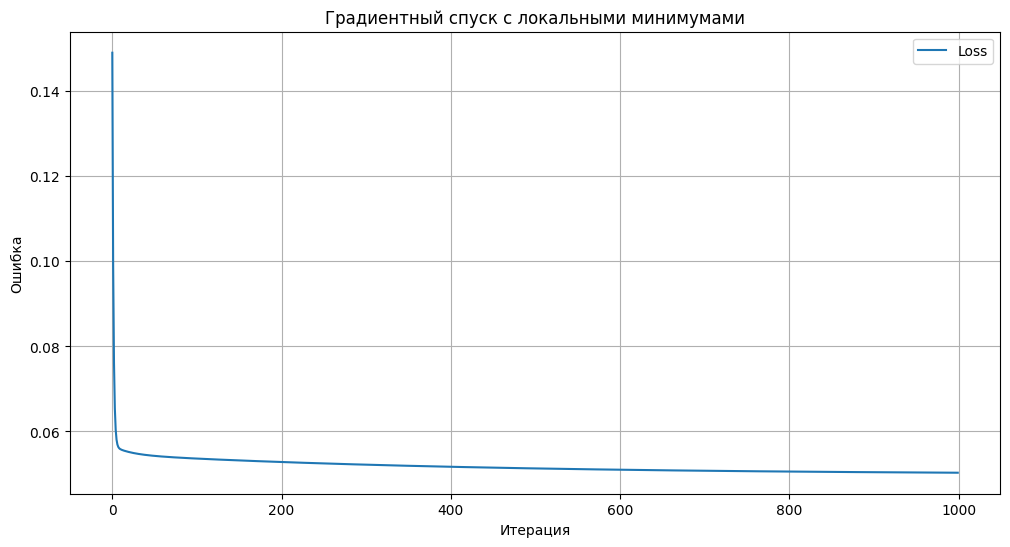

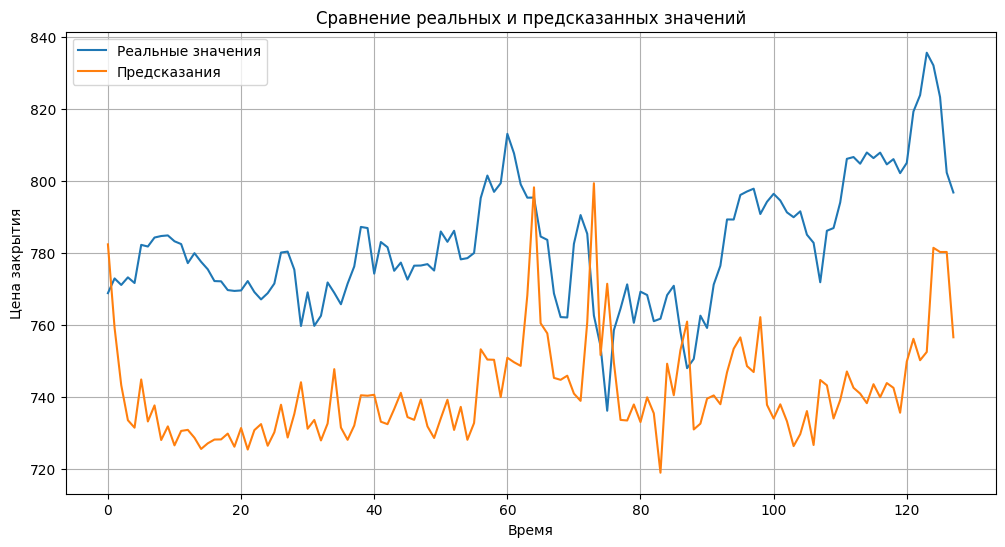

MSE: 549650.35
MAE: 741.25


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('Google_Stock_Price.csv', parse_dates=['Date'])
df = df.sort_values('Date')

X = df[['Open', 'High', 'Low', 'Volume']].values
y = df['Close'].values.reshape(-1,1)


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1, shuffle=False)


class NeuralNetwork:
    def __init__(self):
        self.W = np.random.randn(4, 1) * 0.01
        self.b = np.zeros((1, 1))
    
    def forward(self, X):
        return X @ self.W + self.b
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true)**2)
    
    def train(self, X, y, lr=0.01, epochs=100):
        losses = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y_pred, y)
            losses.append(loss)
            
            
            dW = X.T @ (2*(y_pred - y)) / X.shape[0]
            db = 2*np.mean(y_pred - y)
            
            
            self.W -= lr * dW
            self.b -= lr * db
            
        return losses

model = NeuralNetwork()
losses = model.train(X_train, y_train, lr=0.1, epochs=1000)


plt.figure(figsize=(12,6))
plt.plot(losses, label='Loss')
plt.title('Градиентный спуск с локальными минимумами')
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.legend()
plt.grid(True)
plt.show()


y_pred_scaled = model.forward(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)


plt.figure(figsize=(12,6))
plt.plot(y_true, label='Реальные значения')
plt.plot(y_pred, label='Предсказания')
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Время')
plt.ylabel('Цена закрытия')
plt.legend()
plt.grid(True)
plt.show()

print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')

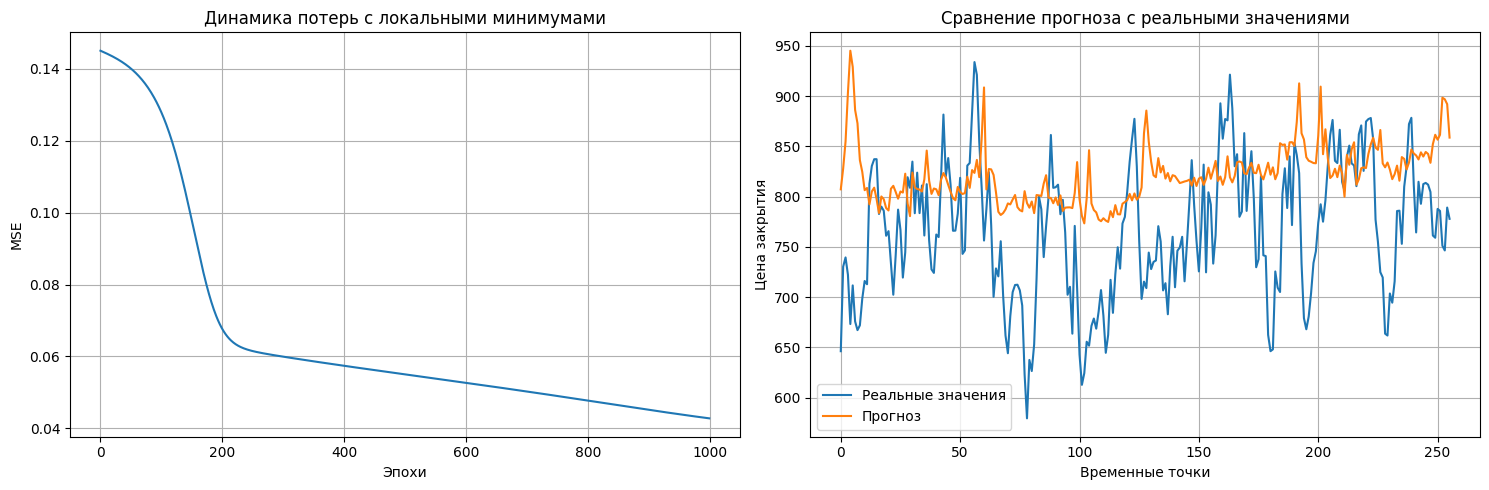

MSE: 675241.00
MAE: 821.24


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


data = pd.read_csv("Google_Stock_Price.csv", parse_dates=['Date'])
data = data.sort_values('Date')

X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Close'].values.reshape(-1, 1)

# Попытка создания искусственных локальных минимумов
def add_correlated_noise(data, strength=0.1, window=10):
    """Добавляет коррелированный шум с эффектом памяти"""
    noise = np.zeros_like(data)
    for i in range(1, len(data)):
        noise[i] = 0.8*noise[i-1] + np.random.normal(0, strength)
    return data * (1 + noise)


y = add_correlated_noise(y, strength=0.05, window=15)

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


train_size = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]


class NeuralNetwork:
    def __init__(self, input_size, hidden_layers=[10, 5]):
        self.weights = []
        prev_size = input_size
        
        for size in hidden_layers:
            self.weights.append(np.random.randn(prev_size, size) * 0.1)
            prev_size = size
        self.weights.append(np.random.randn(prev_size, 1) * 0.1)
        
    def forward(self, X):
        self.activations = [X]
        for i in range(len(self.weights)-1):
            z = np.dot(self.activations[-1], self.weights[i])
            a = np.tanh(z)
            self.activations.append(a)
        output = np.dot(self.activations[-1], self.weights[-1])
        return output
    
    def backward(self, X, y, y_pred, lr=0.01):
        m = X.shape[0]
        gradients = []
        
        error = (y_pred - y) / m
        for i in reversed(range(len(self.weights))):
            grad = np.dot(self.activations[i].T, error)
            gradients.append(grad)
            error = np.dot(error, self.weights[i].T) * (1 - self.activations[i]**2)
        
        for i in range(len(self.weights)):
            self.weights[i] -= lr * gradients[::-1][i]
            
    def train(self, X, y, epochs=1000, lr=0.01):
        losses = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = np.mean((y_pred - y)**2)
            losses.append(loss)
            self.backward(X, y, y_pred, lr)
            
        return losses

model = NeuralNetwork(input_size=X_train.shape[1], hidden_layers=[10, 5])
losses = model.train(X_train, y_train, epochs=1000, lr=0.1)


plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Динамика потерь с локальными минимумами')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
y_pred = scaler_y.inverse_transform(model.forward(X_test))
y_true = scaler_y.inverse_transform(y_test)
plt.plot(y_true, label='Реальные значения')
plt.plot(y_pred, label='Прогноз')
plt.title('Сравнение прогноза с реальными значениями')
plt.xlabel('Временные точки')
plt.ylabel('Цена закрытия')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')

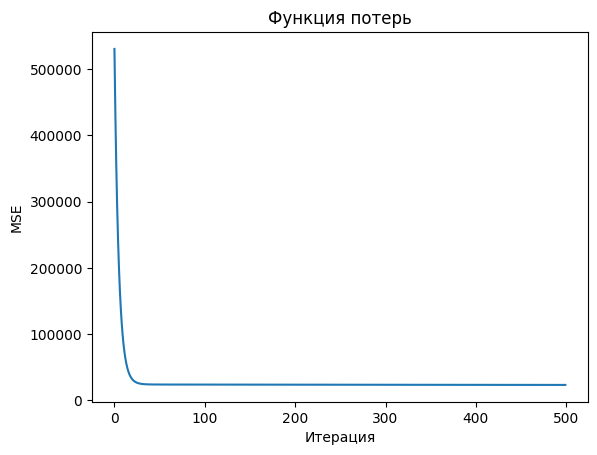

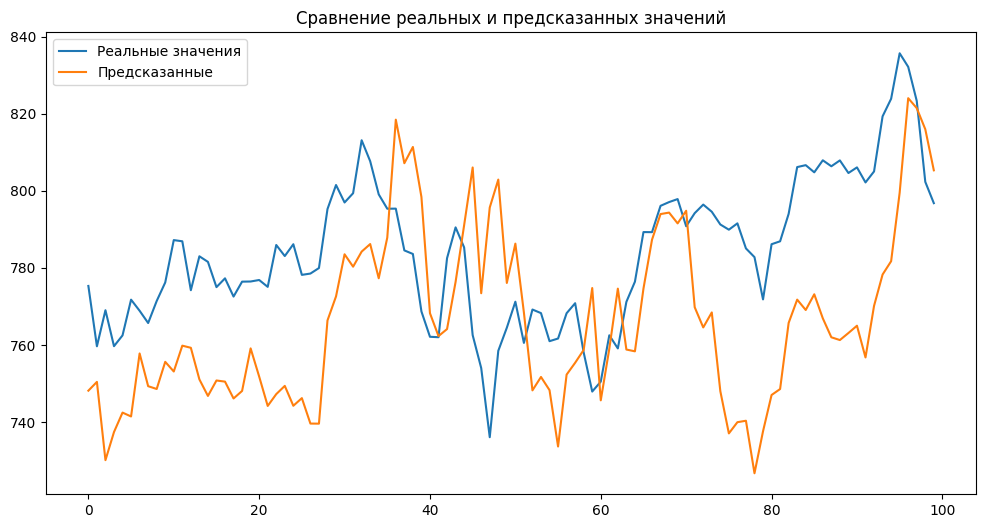

MSE: 834.68
MAE: 25.29


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv('Google_Stock_Price.csv', parse_dates=['Date'])
df.sort_values('Date', inplace=True)

lags = [1, 2, 3]
features = ['Open', 'High', 'Low', 'Volume']

for lag in lags:
    for feature in features:
        df[f'{feature}_lag{lag}'] = df[feature].shift(lag)


df.dropna(inplace=True)

X = df.drop(['Date', 'Close'], axis=1)
y = df['Close']


test_size = 100
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

class GradientDescentRegressor:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y
            
            dw = (1/n_samples) * np.dot(X.T, error)
            db = (1/n_samples) * np.sum(error)

            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            
            loss = np.mean(error**2)
            self.loss_history.append(loss)
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = GradientDescentRegressor(learning_rate=0.1, n_iters=500)
model.fit(X_train_scaled, y_train.values)

plt.plot(model.loss_history)
plt.title('Функция потерь')
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.show()

y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Реальные значения')
plt.plot(y_pred, label='Предсказанные')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.show()


print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')